# eBay camera data exploration analysis
Authoer: Hongkai Yu (hongkaiyu1999@gmail.com)

This document is mainly used for exploratory use, for former analysis, please refer to camera_import.R and camera_explore.R

## Setting up

In [27]:
library(tidyverse)
library(magrittr)
library(lubridate)
library(modelr)

# import data
camera_named <- read_csv("camera_named.csv", col_types = 
                        cols(
                                  bid_id = col_double(),
                                  item_id = col_double(),
                                  product = col_character(),
                                  model = col_character(),
                                  buy_it_now = col_double(),
                                  seller = col_character(),
                                  reserve_price = col_double(),
                                  seller_feedback = col_integer(),
                                  bidder = col_character(),
                                  bid_price = col_double(),
                                  buyer_feedback = col_integer(),
                                  X12 = col_logical(),
                                  X13 = col_logical(),
                                  X14 = col_logical(),
                                  bid_time = col_datetime(format = ""),
                                  start_time = col_datetime(format = ""),
                                  end_time = col_datetime(format = "")
                                ))

# investigate function
investigate_id <- function(id) {
  # easier to investigate an auction
  auctions <- camera_named %>% 
    filter(item_id == id) %>% 
    arrange(desc(bid_time))
  
  p <- ggplot(auctions, aes(x = rank(bid_time), y = bid_price)) +
    geom_hline(aes(yintercept =  mean(buy_it_now), colour = 'BIN price'), alpha = 0.5, size = 2) +
    geom_hline(aes(yintercept =  mean(reserve_price), colour = 'reserve price')) +
    geom_hline(aes(yintercept =  max(bid_price), colour = 'highest price')) +
    scale_colour_manual(values = c("blue", "red", "green")) +
    geom_point() +
    scale_x_continuous(breaks = seq_along(auctions)) +
    labs(
      title = paste("Investigation for the auction of item #", id, sep = ""),
      x = "Rank of Bids (ordered by time)",
      y = "Bid price"
    )
  print(p)
  
  invisible(auctions)
}


# create summary function
trades <- camera_named %>%
  # a summary for all trades
  group_by(item_id) %>% 
  summarise(buy_it_now = median(buy_it_now),
            first_bid = first(bid_price, order_by = bid_time),
            highest_bid = max(bid_price),
            n_bids = n(),
            m_X12 = as.logical(mean(X12)),
            m_X13 = as.logical(mean(X13)),
            m_X14 = as.logical(mean(X14))
            ) %>% 
  arrange(desc(n_bids))

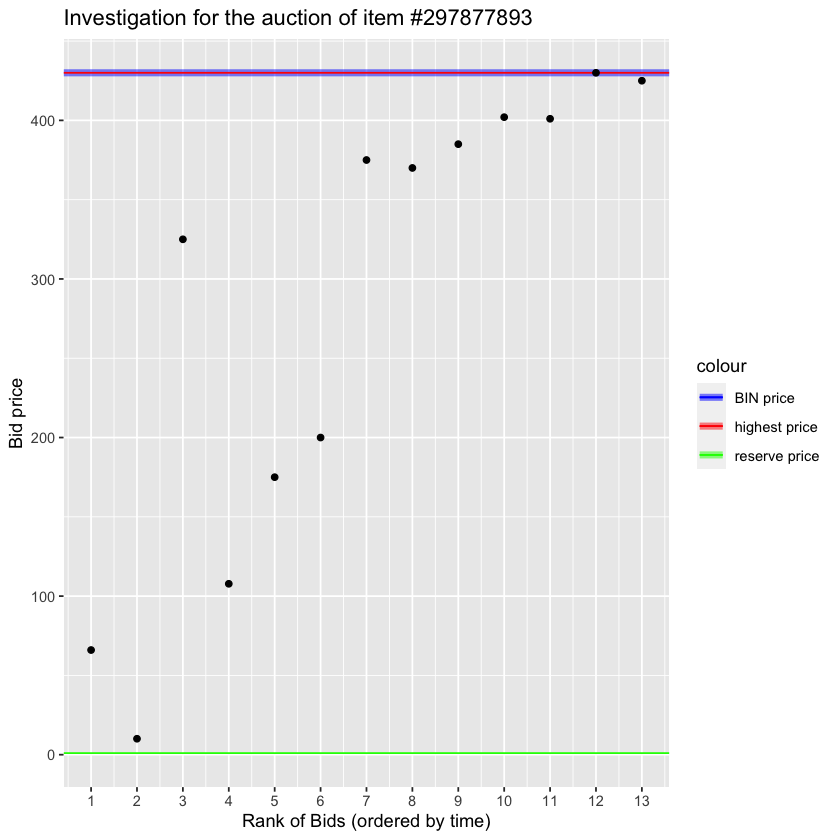

In [28]:
# an example of investigate function
investigate_id(297877893)